In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, Dropdown, IntSlider, FloatText
from IPython import display
from IPython.display import clear_output
from ipywidgets import interact, interact_manual
from IPython.core.display import display
import plotly.offline as py_offline
import plotly.graph_objs as go

from calc_invest import *

%matplotlib inline

In [104]:
def create_graph(args_dict, plot_data):
    """
    Creates graph using current data (default line graph) and creates a file in graph/ dir with unique title
    
    Args:
    args_dict (dictionary) parameters of graph
    data (pd dataframe) data from user input
    
    """
    
    max_val = max(plot_data['total_invested'])
    plt.figure(figsize=(20, 12))
    sns.lineplot(data=plot_data['total_invested'])
    plt.yticks(np.arange(0, max_val, max_val // 15))
    plt.xticks(np.arange(0, max(plot_data.index), 5))
    plt.ticklabel_format(style='plain')
#     plt.ylabel('total_invested')
#     plt.xlabel('years from today')
#     plot = plt.show()
#     print("Investment at retirement: \n{}".format(plot_data['total_invested'].tail(1)))
#     return

In [95]:
def modify_parameters(args_dict):
    param_to_change = widgets.Select(
        options=['annual_taxable_income', 
                 'current_investments', 
                 'expected_pct_dividends', 
                 'min_living_cost', 
                 'filing_status', 
                 'pct_reinvest', 
                 'months_remaining'],
        value='annual_taxable_income',
        # rows=10,
        description='parameter: ',
        disabled=False
    )

    #if param_to_change.value
    updated_value = widgets.Text()
    print("Change as many parameters as you'd like: ")
    display(param_to_change, updated_value)
    #display()

    button = widgets.Button(
        description='Submit Change',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Submit Change',
        icon='check' # (FontAwesome names without the `fa-` prefix)
    )
    display(button)

    def on_button_clicked(i):
        if param_to_change.value == 'filing_status':
            args_dict[param_to_change.value] = updated_value.value
        else:
            args_dict[param_to_change.value] = float(updated_value.value)
    #     for key, value in args_dict.items():
    #         print(f"{key}, {value}\n")
        print(f"{param_to_change.value} : {updated_value.value}")

    button.on_click(on_button_clicked)

## Run tests
Set initial values to calculate investment portfolio

In [58]:
expenses_dict = {'name': ['car', 'rent', 'food', 'gas', 'pets', 'misc'], 
                 'monthly_total': [310, 1200, 350, 150, 80, 200]}

args_dict = {'annual_taxable_income': 50000.0,
             'current_investments': 0,
             'expected_pct_dividends': 0.05,
             'min_living_cost': 30000,
             'filing_status': 'single',
             'pct_reinvest': 0.8,
             'months_remaining': 576}

expense_table = pd.DataFrame(expenses_dict)
expense_table

,name,monthly_total
0,car,310
1,rent,1200
2,food,350
3,gas,150
4,pets,80
5,misc,200


In [59]:
compile_graphs = []

This is intended to maximize your investment portfolio along with quality of life, and focuses more on your future than your present. Sacrifice in the short term will yield comfort in the long term. 



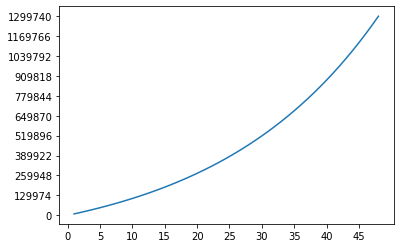

In [60]:
data, plot_yearly, args_dict, expense_table = calc_invest(**args_dict, expense_table=expense_table)
create_graph(args_dict, plot_yearly)
compile_graphs.append(plot_yearly)

In [61]:
data.head()

,investment,discretionary_income,expenses,total_income,year
0,0,210,2290,2500,1
1,750,211,2290,2501,1
2,1502,211,2290,2501,1
3,2258,212,2290,2502,1
4,3015,213,2290,2503,1


In [62]:
modify_parameters(args_dict)

Change as many parameters as you'd like: 


Select(description='parameter: ', options=('annual_taxable_income', 'current_investments', 'expected_pct_divid…

Text(value='')

Button(button_style='info', description='Submit Change', icon='check', style=ButtonStyle(), tooltip='Submit Ch…

annual_taxable_income : 80000
current_investments : 100000
filing_status : mfj
min_living_cost : 50000


In [63]:
args_dict

{'annual_taxable_income': 80000.0,
 'current_investments': 100000.0,
 'expected_pct_dividends': 0.05,
 'min_living_cost': 50000.0,
 'filing_status': 'mfj',
 'pct_reinvest': 0.8,
 'months_remaining': 576}

This is intended to maximize your investment portfolio along with quality of life, and focuses more on your future than your present. Sacrifice in the short term will yield comfort in the long term. 



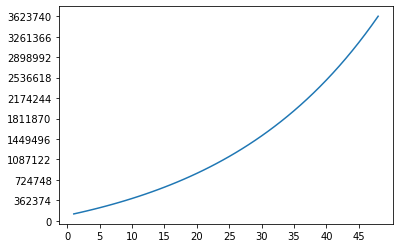

In [64]:
data, plot_yearly, args_dict, expense_table = calc_invest(**args_dict, expense_table=expense_table)
create_graph(args_dict, plot_yearly)
compile_graphs.append(plot_yearly)

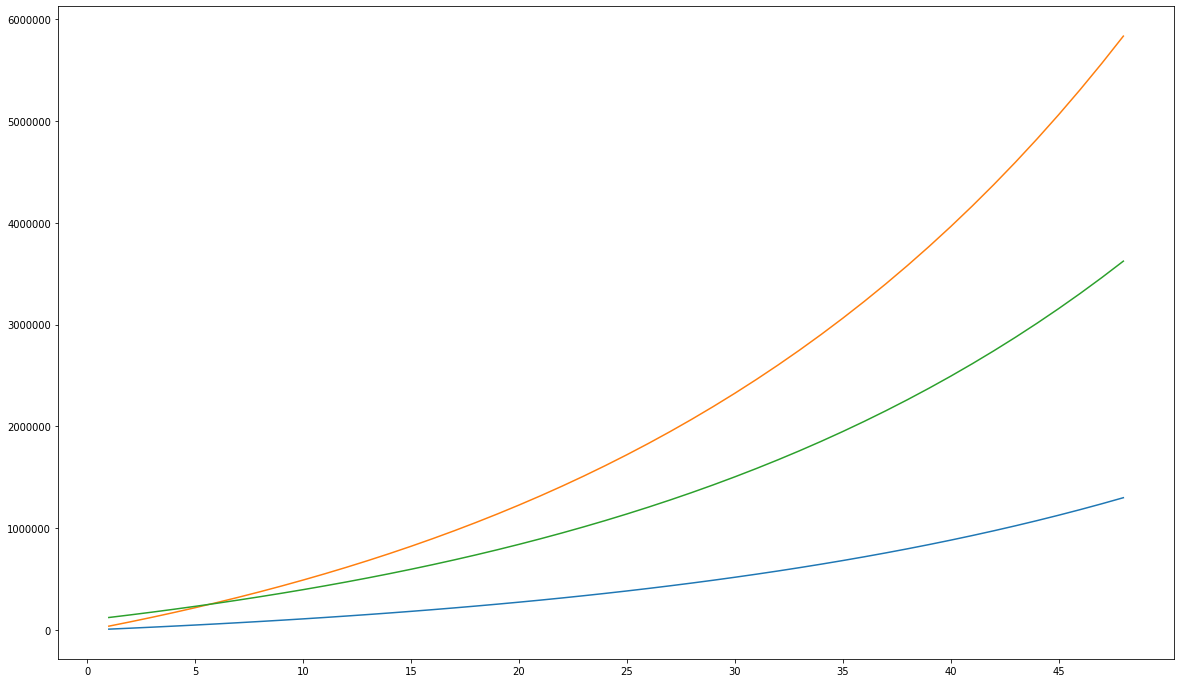

In [22]:
plt.figure(figsize=(20, 12))
for graph in compile_graphs:
    sns.lineplot(data=graph['total_invested'])
    plt.xticks(np.arange(0, max(graph.index), 5))
    plt.ticklabel_format(style='plain')

In [96]:
ati_slide = widgets.FloatText(
                        value=args_dict['annual_taxable_income'],
                        description="Annual Taxable Income"
                    )
c_invest_slide = widgets.FloatText(
                        args_dict['current_investments'], 
                        description="Initial Investment Total"
                    )
pct_div_slide = widgets.FloatSlider(
                        args_dict['expected_pct_dividends'], 
                        min=0.01, 
                        max=0.15, 
                        step=0.01
                    )
min_living_slide = widgets.FloatText(
                        args_dict['min_living_cost'], 
                        description="Minimum Acceptable Living Income"
                    )
filing_select = widgets.Dropdown(
                        options=[('Single', 'single'), ('Married - fj', 'mfj'), ('Married - fs', 'mfs'), ('Head of Household', 'hoh')],
                        value='single',
                        description='Tax filing status',
                    )
pct_reinvest_slide = widgets.FloatText(
                        args_dict['pct_reinvest'], 
                        description="Percent of Dividends to Reinvest (decimal)"
                    )
months_remaining_slide = widgets.IntText(
                        args_dict['months_remaining'], 
                        description="Number of Months Until Retirement"
                    )

In [97]:
def myPlot(**args):
    args_dict = dict(zip(['annual_taxable_income', 'current_investments', 'expected_pct_dividends', 'min_living_cost', 'filing_status', 'pct_reinvest', 'months_remaining'], \
                         [args['annual_taxable_income'], args['current_investments'], args['expected_pct_dividends'], args['min_living_cost'], args['filing_status'], args['pct_reinvest'], args['months_remaining']]))
    data, plot_yearly, args_dict, expense_table = calc_invest(**args_dict, expense_table=args['expense_table'])
    create_graph(args_dict, plot_yearly)

This is intended to maximize your investment portfolio along with quality of life, and focuses more on your future than your present. Sacrifice in the short term will yield comfort in the long term. 



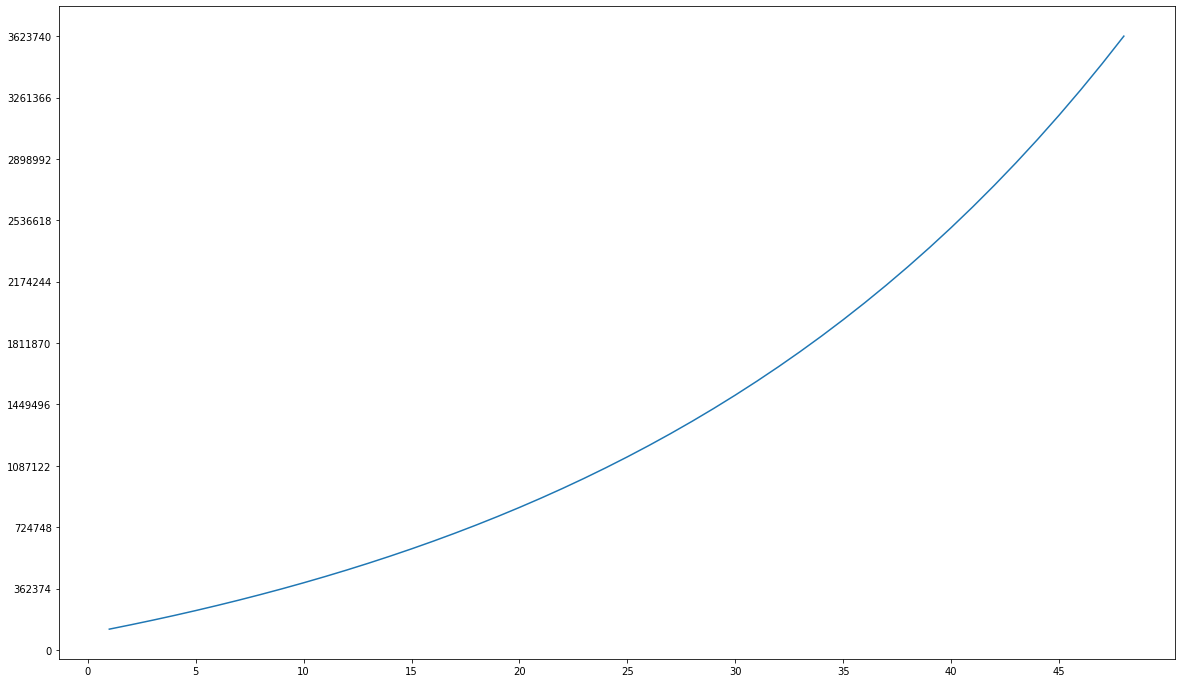

In [100]:
myPlot(**args_dict, expense_table=expense_table.to_dict(orient='list'))

In [101]:
args = {'annual_taxable_income':ati_slide, 
        'current_investments':c_invest_slide, 
        'expected_pct_dividends':pct_div_slide, 
        'min_living_cost':min_living_slide, 
        'filing_status':filing_select, 
        'pct_reinvest':pct_reinvest_slide, 
        'months_remaining':months_remaining_slide,
        'expense_table':{'data':expense_table.to_dict(orient='list')}}

In [102]:
print(expense_table)

   name  monthly_total
0   car            310
1  rent           1200
2  food            350
3   gas            150
4  pets             80
5  misc            200


In [105]:
widgets.interact(myPlot, **args);

interactive(children=(FloatText(value=100000.0, description='Annual Taxable Income'), FloatText(value=0.0, des…

In [106]:
args_dict

{'annual_taxable_income': 80000.0,
 'current_investments': 100000.0,
 'expected_pct_dividends': 0.05,
 'min_living_cost': 50000.0,
 'filing_status': 'mfj',
 'pct_reinvest': 0.8,
 'months_remaining': 576}

In [75]:
pd.set_option('display.latex.longtable',True)

In [ ]:
joined_investments = pd.concat(())

In [ ]:
fig = go.Figure()

for data in compile_graphs:
    
    
#     fig.add_trace(
#         go.Scatter(
#             x=plot_yearly.index,
#             y=plot_yearly.total_invested,
#             mode = 'lines',
#             name = "Investment Outcome Comparison"
#             ))
    
layout = go.Layout(title = 'Investment Outcome Comparison')

py_offline.iplot(fig)

In [ ]:
fig

In [ ]:
plt.figure()
for data in compile_graphs:
    sns.lineplot(data=data['total_invested'])
py_offline.iplot(fig)

You may need to increase max viewable rows. While n = your desired number of rows, use this command: 

```
pd.set_option('display.max_rows', n)
```

In [ ]:
plot_data1 = by_year_calc()
plot_data1['total_invested'] = data.groupby('year')['investment'].last()
plot_data1.tail()

In [ ]:
data.tail()

In [ ]:
args_dict

In [ ]:
args_dict = update(['annual_taxable_income', 'min_living_cost', 'pct_reinvest'], [100000, 40000, 0.8], args_dict)
args_dict

In [ ]:
[value for value in args_dict.values()]

In [ ]:
expense_table

In [ ]:
data, args_dict, expense_table = calc_invest(**args_dict, expense_table=expense_table)

In [ ]:
plot_data2 = by_year_calc()
plot_data2['total_invested'] = data.groupby('year')['investment'].last()
plot_data2.head()

In [ ]:
plot_data1['plot'] = ['plot1' for _ in range(len(plot_data1))]
plot_data2['plot'] = ['plot2' for _ in range(len(plot_data2))]
joined_plot = pd.concat((plot_data1.reset_index(), plot_data2.reset_index()), axis=0).reset_index(drop=True)

In [ ]:
g = sns.FacetGrid(joined_plot, col="plot", sharey=True)
g = (g.map(sns.lineplot, "year", "total_invested"))

In [ ]:
plot_data2.tail()

In [ ]:
plot_data1.tail()

In [ ]:
plt.figure()
sns.lineplot(data=plot_yearly['total_invested'])
sns.lineplot(x=plot_data2.index, y='total_invested', data=plot_data2)
plt.legend()

In [ ]:
plt.figure()
sns.lineplot(x=plot_data1.index, y='total_invested', data=plot_data1)
sns.lineplot(x=plot_data2.index, y='total_invested', data=plot_data2)
plt.legend()

In [ ]:
plt.figure()
plot1 = sns.lineplot(x=plot_data1.index, y='total_invested', data=plot_data1)
plt.savefig('../graphs/ex1.pdf')
plt.figure()
plot2 = sns.lineplot(x=plot_data2.index, y='total_invested', data=plot_data2)
plt.savefig('../graphs/ex2.pdf')

In [ ]:
pd.options.display.max_rows
pd.set_option("display.max_rows", 600)


In [ ]:
quarters = data[data.index % 3 == 0].reset_index(drop=True)
years = data[data.index % 12 == 0].reset_index(drop=True)
fiveyears = data[data.index % 60 == 0].reset_index(drop=True)

In [ ]:
quarters

In [ ]:
sns.lineplot(x=years.reset_index(drop=True).index, y=years.investment);

In [ ]:
sns.lineplot(x=fiveyears.reset_index(drop=True).index, y=fiveyears.investment);